In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pop_inv.POP import POP
import abel
import pickle


fnm = 'pop_inv/img.pkl' # replace with your raw VMI image file
with open(fnm, 'rb') as f:
    img = pickle.load(f)    
    
pop = POP(lmax=4,reg=0,alpha=4e-4,img=img,X0=551,Y0=535,Rmax=450,RBFs_fnm='pop_inv/RBFs512.pkl',edge_w=10)      

Start initialization......
Loading RBFs from pop_inv/RBFs512.pkl......
RBFs loaded.
Continue initialization......
Initialization completed, ready to peel!


basex #############################
Using memory-cached basis sets
Using memory-cached basis sets
Using memory-cached basis sets
Using memory-cached basis sets
hansenlaw #############################
direct #############################
two_point #############################
three_point #############################
onion_peeling #############################
onion_bordas #############################
pop #############################


/sdf/home/x/xiangli/pop/pop_inv/POP.py:69: RuntimeWarning: invalid value encountered in divide
  self.betas[i] = c_arr_i/c_arr_i[0]


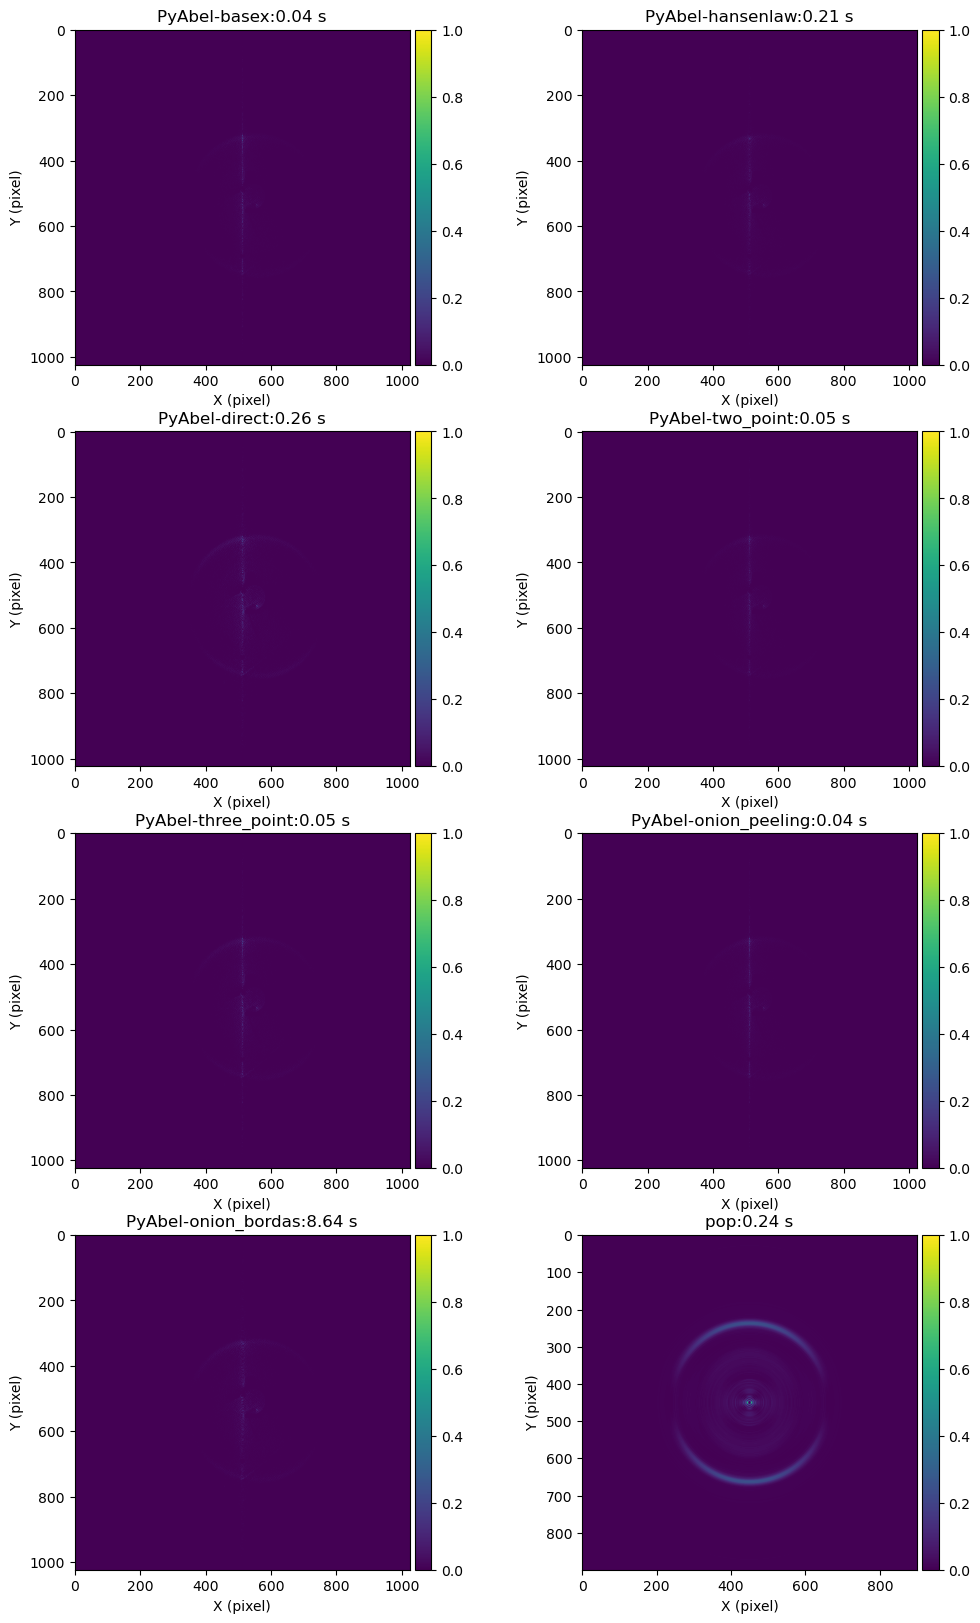

In [8]:


methods = ['basex','hansenlaw','direct','two_point','three_point','onion_peeling','onion_bordas','pop']
imgs = {}
ts = {}
for i, method in enumerate(methods):
    print(method,'#############################')
    if method =='pop':
        t0 = time.time()
        pop.Peel(img)
        imgs[method] = pop.GetSlice()
        t1 = time.time()
        ts[method] = t1-t0
        continue
     
    t0 = time.time()
    imgs[method] = abel.Transform(img, direction='inverse', method=method).transform
    imgs[method][imgs[method]<0]=0
    imgs[method] = imgs[method]/imgs[method].max()    
    t1 = time.time()
    ts[method] = t1-t0
    
fig = plt.figure(figsize=(12,20))
for i, method in enumerate(methods):
    plt.subplot(4,2,i+1)
    im = plt.imshow(imgs[method])
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    if method !='pop':
        ax.set_title('PyAbel-'+method+':'+str(round(ts[method],2))+' s')
    else:
        ax.set_title(method+':'+str(round(ts[method],2))+' s')
    ax.set_xlabel('X (pixel)')
    ax.set_ylabel('Y (pixel)')    
    
# fig.savefig("comparison_with_PyAbel.pdf", bbox_inches='tight')
# print('Plots saved to "comparison_with_PyAbel.pdf".')    
